In [38]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [39]:
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

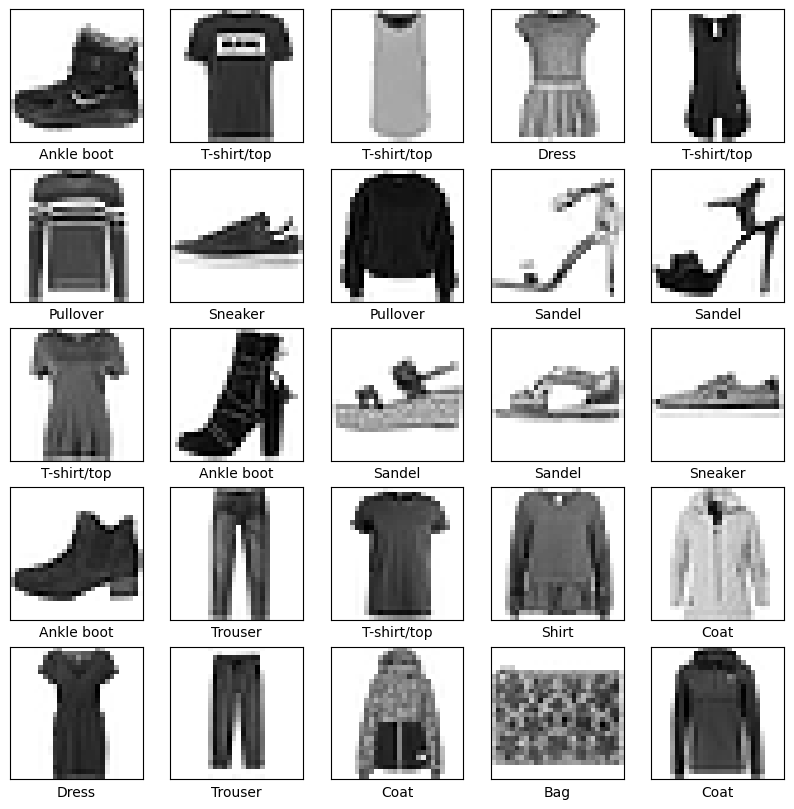

In [40]:
class_names =['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandel','Shirt','Sneaker','Bag','Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  #plt.xlabel(class_names[np.argmax(train_labels[i])])
  plt.xlabel(class_names[(train_labels[i])])
plt.show()

In [41]:
#Normalize the image pixal value from [0-225] and (-1,1):
train_images = (train_images / 127.5) - 1
test_images = (test_images / 127.5) - 1


In [42]:
#convert labels to onne_hot encoding:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [43]:
train_labels

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [44]:
test_labels

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [45]:
train_labels[0:4]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [55]:
#create a simple nrural networkvmodel:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])

In [54]:
#compile the model:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [48]:
#Train the model:
history = model.fit(
    train_images,
    train_labels,
    epochs=10,
    validation_data=(test_images,test_labels)
)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4835 - accuracy: 0.8259 - val_loss: 0.4353 - val_accuracy: 0.8396
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3732 - accuracy: 0.8640 - val_loss: 0.4022 - val_accuracy: 0.8565
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3385 - accuracy: 0.8755 - val_loss: 0.3772 - val_accuracy: 0.8651
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3142 - accuracy: 0.8842 - val_loss: 0.3691 - val_accuracy: 0.8691
Epoch 5/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2982 - accuracy: 0.8900 - val_loss: 0.3628 - val_accuracy: 0.8716
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2834 - accuracy: 0.8953 - val_loss: 0.3455 - val_accuracy: 0.8780
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2714 - accuracy: 0.8995 - val_loss: 0.3602 - val_accurac

Text(0.5, 1.0, 'Accuracy evolution')

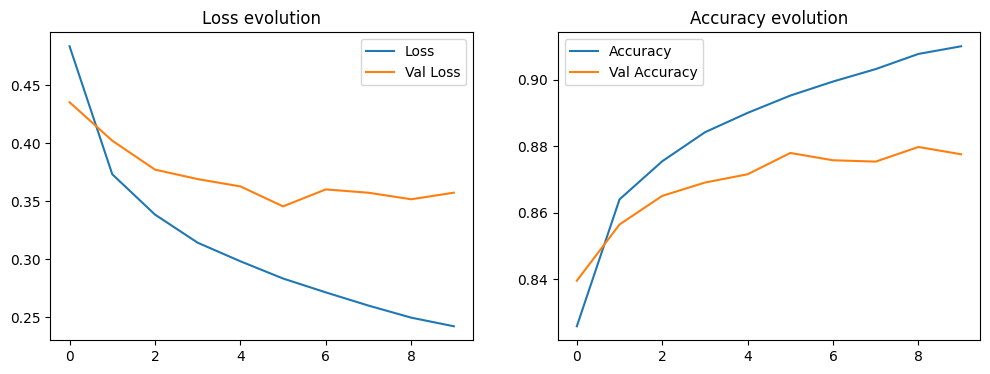

In [49]:
#plot training history:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='Loss')
plt.plot(history.history['val_loss'],label='Val Loss')
plt.legend()
plt.title('Loss evolution')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val Accuracy')
plt.legend()
plt.title('Accuracy evolution')

313/313 [==============================] - 1s 2ms/step


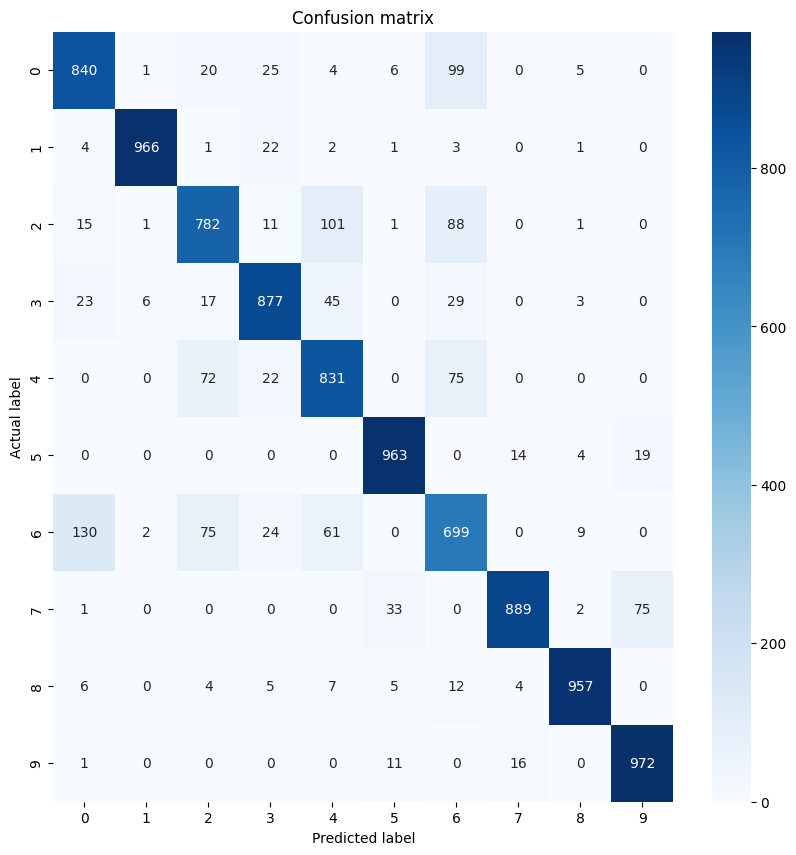

In [52]:
#visualize the confusion matrix to understand the preformance on different classes:

y_pred=model.predict(test_images)
y_pred_classes = np.argmax(y_pred,axis=1)
y_true = np.argmax(test_labels,axis=1)

cm = confusion_matrix(y_true,y_pred_classes)

plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()